# Notebook to show some predictions for the dataset UrbanSound8K

In [1]:
import os
import matplotlib.pyplot as plt
import librosa
import librosa.display
import numpy as np
import tensorflow as tf

from IPython.display import Audio

In [2]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if len(physical_devices) > 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
print(physical_devices)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


## Load the model

In [3]:
# load the tensorflow model
model = tf.keras.models.load_model('models' +os.sep+ 'best_model.h5')
target_size = (450, 450)

id2class = {'0': 'air_conditioner',
            '1': 'car_horn',
            '2': 'children_playing',
            '3': 'dog_bark',
            '4': 'drilling',
            '5': 'engine_idling',
            '6': 'gun_shot',
            '7': 'jackhammer',
            '8': 'siren',
            '9': 'street_music'}

## Load a random audio file

In [4]:
# load a random audio file
fold = np.random.choice(os.listdir('audio'))

path = 'audio' +os.sep+ fold +os.sep

audios = [audio for audio in os.listdir(path) if audio.endswith('.wav')]

file_name = np.random.choice(audios)
file = path + file_name

print('File:', file_name)
x, sr = librosa.load(file, sr=None)
Audio(file, rate=sr)

File: 111386-5-1-0.wav


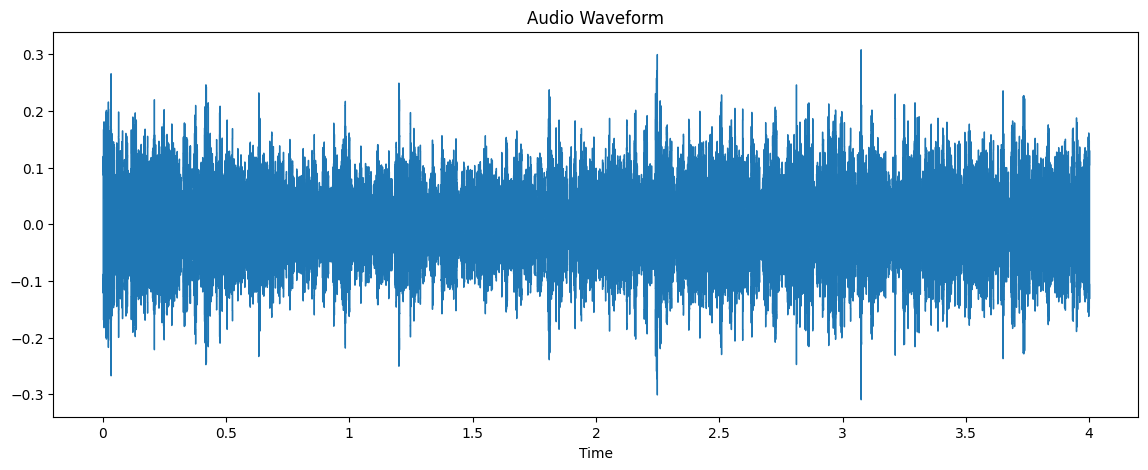

In [5]:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x, sr=sr)
plt.title('Audio Waveform')
plt.show()

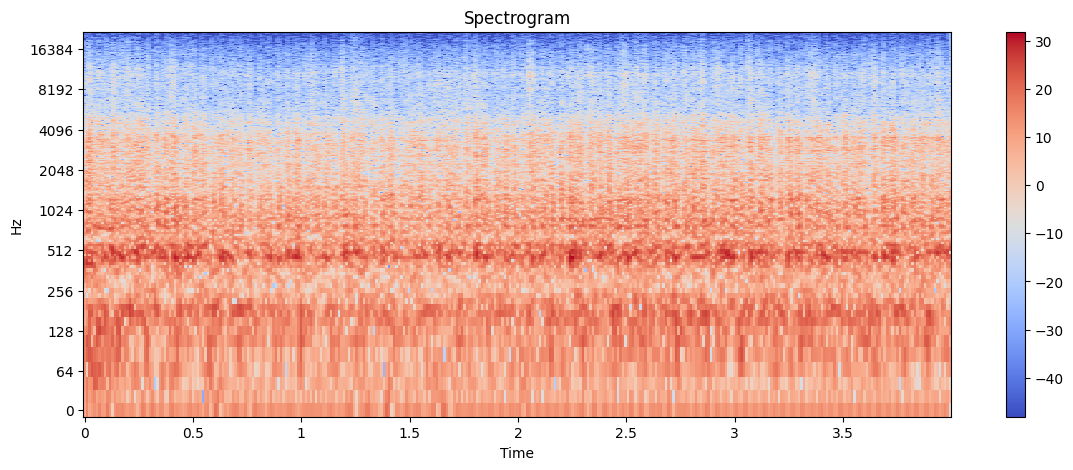

In [6]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()
plt.title('Spectrogram')
plt.show()

## Predict the urban sound

In [7]:
image = tf.keras.utils.load_img('images' +os.sep+ fold +os.sep+ file_name+'.png', target_size=target_size)

img_array = tf.keras.utils.img_to_array(image)
img_array = tf.expand_dims(img_array, 0) # Create a batch
predictions = model(img_array)

# get the predicted class
predicted_class = id2class[str(np.argmax(predictions[0]))]
real_class = id2class[file_name.split('-')[1]]

# print the prediction
print('File:', file_name)
print(f"Predicted sound:", predicted_class)
print("Actual sound:", real_class)
if predicted_class == real_class:
    print("*** Correct prediction! ***")

File: 111386-5-1-0.wav
Predicted sound: engine_idling
Actual sound: engine_idling
*** Correct prediction! ***
